Відрізок 1:
S_0(x) = 0.82 + 3.3026(x - 1.2) + 0.0(x - 1.2)^2 + -15.9547(x - 1.2)^3, x належить [1.2, 1.5]
Відрізок 2:
S_1(x) = 1.38 + -1.0052(x - 1.5) + -14.3593(x - 1.5)^2 + 27.6493(x - 1.5)^3, x належить [1.5, 1.9]
Відрізок 3:
S_2(x) = 0.45 + 0.7791(x - 1.9) + 18.8199(x - 1.9)^2 + -22.996(x - 1.9)^3, x належить [1.9, 2.4]
Відрізок 4:
S_3(x) = 2.67 + 5.6432(x - 2.4) + -15.6742(x - 2.4)^2 + -7.4639(x - 2.4)^3, x належить [2.4, 3.1]
Значення сплайна:
x = 1.20, y = 0.820
x = 1.22, y = 0.954
x = 1.24, y = 1.071
x = 1.26, y = 1.172
x = 1.28, y = 1.258
x = 1.30, y = 1.329
x = 1.32, y = 1.386
x = 1.33, y = 1.431
x = 1.35, y = 1.462
x = 1.37, y = 1.483
x = 1.39, y = 1.492
x = 1.41, y = 1.492
x = 1.43, y = 1.482
x = 1.45, y = 1.463
x = 1.47, y = 1.437
x = 1.49, y = 1.404
x = 1.51, y = 1.365
x = 1.53, y = 1.320
x = 1.55, y = 1.271
x = 1.56, y = 1.217
x = 1.58, y = 1.161
x = 1.60, y = 1.102
x = 1.62, y = 1.041
x = 1.64, y = 0.980
x = 1.66, y = 0.918
x = 1.68, y = 0.857
x = 1.70, y = 0.798
x = 1.

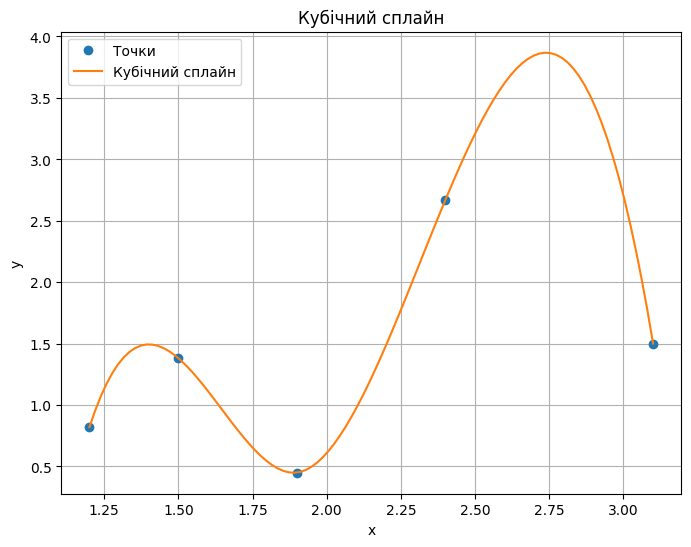

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([1.2, 1.5, 1.9, 2.4, 3.1])
y = np.array([0.82, 1.38, 0.45, 2.67, 1.5])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
 alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
 l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
 mu[i] = h[i] / l[i]
 z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
# Виправлення обчислення коефіцієнтів для останнього відрізка
#c[n-1] = 0
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
 c[j] = z[j] - mu[j] * c[j+1]
 b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
 d[j] = (c[j+1] - c[j]) / (3 * h[j])
# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
 print(f"Відрізок {i+1}:")
 print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
# Роздрукуйте значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()